<a href="https://colab.research.google.com/github/AniruddhSrivatsa/AniruddhSrivatsa/blob/master/housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
df.shape

(1460, 81)

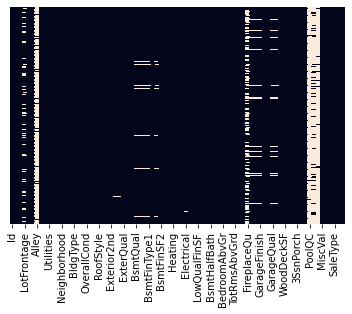

In [19]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False)

In [20]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(40)


,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [21]:
df1=df.copy()

In [22]:
df1.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],inplace=True,axis=1)

We removed the columns which have large amount of missing values

In [24]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [25]:
df1[missing_data[5:19].index].dtypes

LotFrontage     float64
GarageYrBlt     float64
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
BsmtFinType2     object
BsmtExposure     object
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

In [26]:
for col in ["LotFrontage","GarageYrBlt","MasVnrArea"]:
  df1[col].fillna(df1[col].median(),inplace=True)

In [27]:
df1[["LotFrontage","GarageYrBlt","MasVnrArea"]].isna().sum()

LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64

In [28]:
col_names=["GarageType","GarageFinish","GarageQual","GarageCond","BsmtFinType2","BsmtExposure","BsmtFinType1","BsmtCond","BsmtQual","MasVnrType","Electrical"]

In [34]:
df1[col_names].mode()

,GarageType,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrType,Electrical
0,Attchd,Unf,TA,TA,Unf,No,Unf,TA,TA,None,SBrkr


In [36]:
df1["GarageType"].mode()[0]

'Attchd'

In [138]:
df["LotFrontage"].median()

69.0

In [30]:

for col in col_names:
        df1[col].fillna(df1[col].mode()[0],inplace=True)
        

In [37]:
df1[col_names].isna().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
BsmtFinType2    0
BsmtExposure    0
BsmtFinType1    0
BsmtCond        0
BsmtQual        0
MasVnrType      0
Electrical      0
dtype: int64

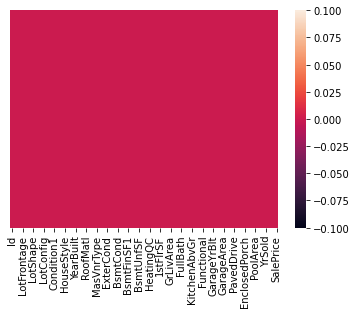

In [38]:
sns.heatmap(df1.isna(),yticklabels=False)

I will check whether a column is deleted or not

In [39]:
df1["PoolQC"]

KeyError: ignored

In [40]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [41]:
categorical_features=[feature for feature in df1.columns if df1[feature].dtype=='O']

In [42]:
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [43]:
for cat in categorical_features:
  print("The category {} has {} unique elements".format(cat,len(df1[cat].unique())))

The category MSZoning has 5 unique elements
The category Street has 2 unique elements
The category LotShape has 4 unique elements
The category LandContour has 4 unique elements
The category Utilities has 2 unique elements
The category LotConfig has 5 unique elements
The category LandSlope has 3 unique elements
The category Neighborhood has 25 unique elements
The category Condition1 has 9 unique elements
The category Condition2 has 8 unique elements
The category BldgType has 5 unique elements
The category HouseStyle has 8 unique elements
The category RoofStyle has 6 unique elements
The category RoofMatl has 8 unique elements
The category Exterior1st has 15 unique elements
The category Exterior2nd has 16 unique elements
The category MasVnrType has 4 unique elements
The category ExterQual has 4 unique elements
The category ExterCond has 5 unique elements
The category Foundation has 6 unique elements
The category BsmtQual has 4 unique elements
The category BsmtCond has 4 unique elements
Th

In [44]:
df2=df1.copy()

In [45]:
type(categorical_features)

list

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_features:
  le.fit(list(df2[i]))
  df2[i]=le.transform(list(df2[i]))

In [47]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [48]:

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df2[feature]=df2['YrSold']-df2[feature]

In [49]:
df2.drop("YrSold",inplace=True,axis=1)

In [50]:
df2.drop("Id",inplace=True,axis=1)

In [51]:
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,5.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,31.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,7.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,91,36,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,8.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,8,8,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,8.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,8,4,250000


In [52]:
df3=df2.copy()

In [53]:
df3.drop("SalePrice",axis=1,inplace=True)

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [58]:
pipe=Pipeline([("std",StandardScaler()),("pca",PCA())])

In [59]:
df3_pca=pipe.fit_transform(df3)

In [60]:
df3_pca

array([[ 2.16392325e+00,  1.67713540e-01, -1.92396666e+00, ...,
        -9.72714076e-02,  2.77601608e-14, -3.27209108e-15],
       [ 1.98077805e-01, -1.81741394e+00,  1.51562166e+00, ...,
         9.78650032e-02, -3.12224203e-15, -1.82906323e-15],
       [ 2.58887466e+00, -2.99174620e-04, -1.47510550e+00, ...,
        -2.53785689e-01, -5.55690262e-15,  6.82218358e-15],
       ...,
       [ 1.25729123e+00,  2.84841594e+00,  1.31703752e-01, ...,
        -7.84957091e-02, -7.67273223e-17,  7.24137513e-17],
       [-3.03754610e+00, -2.51333620e+00,  2.23567101e+00, ...,
         1.08377580e-02, -6.30026737e-16, -1.42790543e-16],
       [-8.04134593e-01, -2.46066411e+00,  1.90858170e+00, ...,
         6.32349563e-02,  3.50364819e-16, -3.31943377e-17]])

In [61]:
pipe.steps[1][1].explained_variance_ratio_.cumsum()

array([0.14163522, 0.19677377, 0.24724835, 0.28739016, 0.3184368 ,
       0.34690586, 0.37163113, 0.39513342, 0.41674645, 0.43794142,
       0.45790653, 0.47731306, 0.49559278, 0.51368474, 0.53101222,
       0.54705231, 0.56290537, 0.57841047, 0.59369553, 0.60882233,
       0.62346116, 0.63792138, 0.65205957, 0.66604357, 0.67942861,
       0.69266863, 0.70545672, 0.71785954, 0.72982041, 0.74157668,
       0.7531307 , 0.76458878, 0.77585661, 0.7866064 , 0.79717774,
       0.80754122, 0.81767093, 0.82715771, 0.83644995, 0.84547455,
       0.85437365, 0.86307763, 0.87141934, 0.87958021, 0.88751039,
       0.89513516, 0.90236202, 0.9092959 , 0.91574489, 0.92212459,
       0.9282096 , 0.93409501, 0.93979795, 0.94526951, 0.95052544,
       0.95573255, 0.96069213, 0.96536878, 0.96979127, 0.97402077,
       0.97767184, 0.98110533, 0.98418227, 0.98721441, 0.99018479,
       0.99255356, 0.9944059 , 0.99611905, 0.99757709, 0.99881797,
       1.        , 1.        , 1.        ])

In [62]:
pca_df=pd.DataFrame(df3_pca,columns=df2.columns[:-1])
pca_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition
0,2.163923,0.167714,-1.923967,1.406348,-1.091429,0.728282,-0.190785,-0.702997,-1.841626,0.739983,0.750303,0.125383,0.359450,-0.722400,-0.596962,-0.008378,-0.766979,-0.167153,0.351116,-0.094479,-0.124016,1.018361,-0.253525,0.489642,-1.081810,0.139615,-1.047751,-0.597125,-0.495415,0.177761,-0.529899,0.269599,-0.155331,0.790038,-0.304372,-0.637828,-0.065883,-0.394154,-0.017464,0.691476,0.108794,-0.401445,-0.149988,-0.437536,0.210636,0.230866,-0.128639,-0.095176,-0.209701,-0.429623,-0.224875,0.237732,-0.622376,-0.073222,-0.265492,0.018430,-0.341823,0.189187,0.288854,0.414426,-0.316916,-0.002984,0.132163,-0.074705,0.147696,-0.352149,0.105671,0.207396,0.218637,-0.057316,-0.097271,2.776016e-14,-3.272091e-15
1,0.198078,-1.817414,1.515622,0.330177,-0.872853,-0.648112,-1.170285,-0.235296,0.249358,-0.738344,-1.007236,0.432075,-0.238375,1.074143,1.602131,-1.114720,0.862498,1.083204,-1.880706,-1.342639,0.237879,2.276857,1.224853,0.656289,0.164226,-0.985896,1.194069,1.130490,1.015134,0.424106,-0.243784,0.061989,-1.371268,-1.044092,-0.459460,0.428256,0.189057,-0.094849,-0.761670,0.004606,0.205071,-0.191993,-0.975477,0.220250,-0.895731,-1.177932,-0.233211,0.718064,0.593518,-0.620830,-0.227780,0.050958,0.276644,0.549727,0.901399,0.016904,-0.143592,0.197166,0.239370,0.129020,-0.070845,0.100833,-0.939255,0.530764,-0.418849,-0.103744,0.136854,0.468808,-0.109043,0.023432,0.097865,-3.122242e-15,-1.829063e-15
2,2.588875,-0.000299,-1.475106,1.143964,-1.396289,0.762264,0.277400,-0.935989,-0.776403,0.305298,0.825258,0.246126,0.640167,-0.294454,-0.266521,0.142220,0.105403,0.003980,-0.021468,-0.416821,0.473558,-0.893160,-0.544587,-0.238912,0.080893,-0.053845,-0.720412,-0.090735,0.317903,-0.422594,-0.784183,-0.033069,0.762409,0.138630,-0.160783,-0.510228,-0.557965,-0.196224,0.582695,-0.033702,0.214319,-0.494582,0.736128,-0.293855,0.672895,0.292402,0.075702,-0.264306,-0.168253,-0.391653,-0.003302,0.143823,-0.702024,-0.018291,0.197822,-0.029413,-0.424185,0.242500,-0.123110,0.377308,-0.448357,0.402911,-0.087942,0.207625,-0.221576,0.360464,-0.148619,-0.555020,-0.104892,0.018317,-0.253786,-5.556903e-15,6.822184e-15
3,-1.372704,1.348836,0.970137,0.385470,-0.991600,1.552118,-0.765885,0.264855,-0.988766,1.594130,0.898691,1.646931,-1.537812,1.545537,0.829631,0.261733,-1.423768,2.600864,1.171972,2.007115,-1.586547,-1.828701,-0.142875,-0.560144,-0.090163,-0.881901,-0.193308,1.338645,-0.739520,1.604025,-1.342354,1.195251,0.705456,0.094110,-2.141688,-0.243620,2.117741,1.009866,-0.118309,-0.532462,-0.826523,-0.942042,1.339423,-0.367873,0.781505,0.881042,-0.684917,-0.022744,0.019970,-0.416346,0.536756,-1.206694,-0.366545,0.171632,-1.128470,0.687413,-1.071057,0.154788,-0.392770,-0.066143,-0.014676,0.056070,0.175517,0.454672,1.773961,-0.356470,-0.290321,-0.302518,-0.046183,0.747282,0.884163,8.191918e-15,2.095167e-15
4,4.930739,1.232219,0.109300,1.628263,-1.040159,0.594439,0.158757,-0.905619,-0.836080,0.734004,0.989361,-0.035214,0.029458,0.299608,1.006145,-0.503613,0.636735,0.162127,-0.566305,-0.368247,0.247415,-1.429569,-0.224102,-0.651703,0.441340,0.498762,-0.118724,-0.145603,0.885635,-1.222811,-0.498999,0.157378,0.805843,-0.099605,-0.523610,0.563670,-0.241238,0.297661,0.330061,0.326417,0.2250

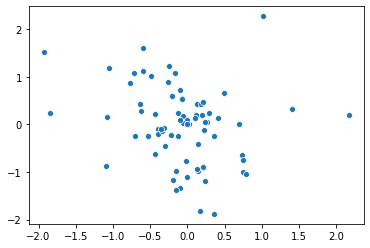

In [63]:
sns.scatterplot(df3_pca[0],df3_pca[1])

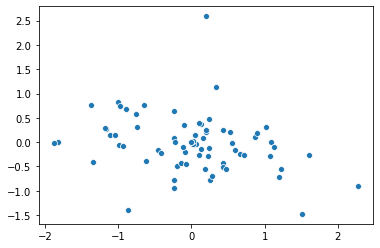

In [64]:
sns.scatterplot(df3_pca[1],df3_pca[2])

we can see that the data is distributed around origin

In [65]:
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,5.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,31.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,7.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,91,36,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,8.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,8,8,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,8.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,8,4,250000


In [66]:
df4=df2.copy()

In [67]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split
import xgboost as xgb

In [68]:
xgb_pipeline = Pipeline([("scaler",StandardScaler()),("xgb",xgb.XGBRegressor())])

In [69]:
X=df4.drop("SalePrice",inplace=False,axis=1)
y=df4[["SalePrice"]]
print(X.shape,y.shape)

(1460, 73) (1460, 1)


In [70]:
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [72]:
print(X_train.shape,X_test.shape)

(1168, 73) (292, 73)


In [74]:
boston_dmatrix = xgb.DMatrix(data=X,label=y)
params={"objective":"reg:linear","max_depth":4}
l1_params = [1,10,50,100]
rmses_l1=[]


We will do cross-validation now

In [75]:
for reg in l1_params:
 params["alpha"] = reg
 cv_results = xgb.cv(dtrain=boston_dmatrix, params=params,nfold=4,num_boost_round=10,metrics="rmse",as_pandas=True,seed=123)
 rmses_l1.append(cv_results["test-rmse-mean"].tail(1).values[0])
 print("Best rmse as a function of l1:")
 print(pd.DataFrame(list(zip(l1_params,rmses_l1)), columns=["l1","rmse"]))

[04:44:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best rmse as a function of l1:
   l1          rmse
0   1  32921.337403
[04:44:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:03] WARNING: /workspace/src/objec

Now we will use RandomSearch CV

In [77]:
sc1=StandardScaler()

In [78]:
X_train=sc1.fit_transform(X_train)
X_test=sc1.transform(X_test)

In [79]:
gbm_param_grid = {'learning_rate': np.arange(0.04,1.05,.05),
'n_estimators': [155,165,175,180],
'subsample': np.arange(0.04,1.05,.05)}

In [80]:
xgb.XGBRegressor().get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)>

In [81]:
random_cv=RandomizedSearchCV(estimator=xgb.XGBRegressor(),param_distributions=gbm_param_grid,n_iter=25,cv=6,n_jobs=-1)

In [82]:
random_cv.fit(X_train,y_train)

[04:46:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'learning_rate': array([0.04, 0.09, 0.14, 0.19, 0.24, 0.29, 0.34, 0.39, 0.44, 0.49, 0.54,
       0.59, 0.64, 0.69, 0.74, 0.79, 0.84, 0.89, 0.94, 0.9

In [83]:
print("Best parameters found: ",random_cv.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(random_cv.best_score_)))

Best parameters found:  {'subsample': 0.64, 'n_estimators': 155, 'learning_rate': 0.09}
Lowest RMSE found:  0.9301634546381069


In [84]:
X_test.shape

(292, 73)

In [86]:
y_pred=random_cv.predict(X_test)
y_pred=y_pred.reshape(292,1)
y_pred[:20]

array([[232356.92 ],
       [157364.02 ],
       [112115.04 ],
       [219781.4  ],
       [ 92372.06 ],
       [ 97086.64 ],
       [270155.4  ],
       [126694.445],
       [449848.53 ],
       [155168.52 ],
       [211453.14 ],
       [147043.86 ],
       [225568.58 ],
       [135314.58 ],
       [125619.37 ],
       [143361.61 ],
       [221256.3  ],
       [124759.39 ],
       [142490.69 ],
       [178337.28 ]], dtype=float32)

In [88]:
y_arr=np.array(y_test)
y_arr[:20]

array([[200624],
       [133000],
       [110000],
       [192000],
       [ 88000],
       [ 85000],
       [282922],
       [141000],
       [745000],
       [148800],
       [208900],
       [136905],
       [225000],
       [123000],
       [119200],
       [145000],
       [190000],
       [123600],
       [149350],
       [155000]])

In [89]:
print(y_pred.shape,y_arr.shape)

(292, 1) (292, 1)


In [90]:
from sklearn.metrics import mean_squared_error as mse,accuracy_score
acc=np.sqrt(mse(y_arr,y_pred))
acc


31886.867009695532

Lets try another method

In [91]:
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)


In [92]:
params = {"booster":"gbtree","objective":"reg:linear"}
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=10)


[04:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [93]:
preds = xg_reg.predict(DM_test)
preds[:20]

array([165400.73 , 144155.5  , 112523.5  , 208931.52 ,  87076.97 ,
        92104.64 , 248249.14 , 126819.984, 237723.8  , 162842.86 ,
       207117.19 , 143051.8  , 225657.97 , 121704.15 , 131424.28 ,
       142397.39 , 214933.06 , 126784.75 , 132582.19 , 175865.17 ],
      dtype=float32)

In [94]:
acc_67=np.sqrt(mse(y_arr,preds))
acc_67

39580.50365813423

Our Random Search model is better than DMatrix method therefore we will use random search to train our entire dataset

In [95]:
random_cv=RandomizedSearchCV(estimator=xgb.XGBRegressor(),param_distributions=gbm_param_grid,n_iter=25,cv=9,n_jobs=-1)

In [97]:
sc2=StandardScaler()

In [98]:
X=sc2.fit_transform(X)

In [100]:
random_cv.fit(X,y)

[04:51:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=9, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'learning_rate': array([0.04, 0.09, 0.14, 0.19, 0.24, 0.29, 0.34, 0.39, 0.44, 0.49, 0.54,
       0.59, 0.64, 0.69, 0.74, 0.79, 0.84, 0.89, 0.94, 0.9

In [101]:
print("Best parameters found: ",random_cv.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(random_cv.best_score_)))

Best parameters found:  {'subsample': 0.7899999999999999, 'n_estimators': 165, 'learning_rate': 0.29}
Lowest RMSE found:  0.9412418954100368


In [102]:
y_pred1=random_cv.predict(X)
y_pred1=y_pred1.reshape(1460,1)


In [103]:
acc_678=np.sqrt(mse(y,y_pred1))
acc_678

7634.740062851196

Ahhhh.... here we go again..

In [105]:
test_df=pd.read_csv("test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [106]:
all_data_na1 = (test_df.isnull().sum() / len(test_df)) * 100
all_data_na1 = all_data_na1.drop(all_data_na1[all_data_na1 == 0].index).sort_values(ascending=False)[:33]
missing_data1 = pd.DataFrame({'Missing Ratio' :all_data_na1})
missing_data1.head(40)


,Missing Ratio
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageYrBlt,5.346127
GarageCond,5.346127
GarageQual,5.346127
GarageFinish,5.346127


In [107]:
test_df1=test_df.copy()

In [108]:
test_df1.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],inplace=True,axis=1)

In [109]:
test_df1[missing_data1[5:33].index].dtypes

LotFrontage     float64
GarageYrBlt     float64
GarageCond       object
GarageQual       object
GarageFinish     object
GarageType       object
BsmtCond         object
BsmtExposure     object
BsmtQual         object
BsmtFinType1     object
BsmtFinType2     object
MasVnrType       object
MasVnrArea      float64
MSZoning         object
BsmtFullBath    float64
BsmtHalfBath    float64
Utilities        object
Functional       object
Exterior2nd      object
Exterior1st      object
SaleType         object
BsmtFinSF1      float64
BsmtFinSF2      float64
BsmtUnfSF       float64
KitchenQual      object
GarageCars      float64
GarageArea      float64
TotalBsmtSF     float64
dtype: object

In [110]:
lll=[fea for fea in missing_data1[5:33].index if test_df1[fea].dtypes =="float"]
fff=[fea for fea in missing_data1[5:33].index if test_df1[fea].dtypes =="object"]
print(lll,fff)

['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageCars', 'GarageArea', 'TotalBsmtSF'] ['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType', 'KitchenQual']


In [111]:
for col in lll:
  test_df1[col].fillna(test_df1[col].median(),inplace=True)

In [112]:
for col1 in fff:
  test_df1[col1].fillna(test_df1[col1].mode()[0],inplace=True)

In [113]:
test_df1[lll].isna().sum()

LotFrontage     0
GarageYrBlt     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
dtype: int64

In [114]:
test_df1[fff].isna().sum()

GarageCond      0
GarageQual      0
GarageFinish    0
GarageType      0
BsmtCond        0
BsmtExposure    0
BsmtQual        0
BsmtFinType1    0
BsmtFinType2    0
MasVnrType      0
MSZoning        0
Utilities       0
Functional      0
Exterior2nd     0
Exterior1st     0
SaleType        0
KitchenQual     0
dtype: int64

In [115]:
categorical_features1=[feature for feature in test_df1.columns if test_df1[feature].dtype=='O']

In [116]:
for cat in categorical_features1:
  print("The category {} has {} unique elements".format(cat,len(test_df1[cat].unique())))

The category MSZoning has 5 unique elements
The category Street has 2 unique elements
The category LotShape has 4 unique elements
The category LandContour has 4 unique elements
The category Utilities has 1 unique elements
The category LotConfig has 5 unique elements
The category LandSlope has 3 unique elements
The category Neighborhood has 25 unique elements
The category Condition1 has 9 unique elements
The category Condition2 has 5 unique elements
The category BldgType has 5 unique elements
The category HouseStyle has 7 unique elements
The category RoofStyle has 6 unique elements
The category RoofMatl has 4 unique elements
The category Exterior1st has 13 unique elements
The category Exterior2nd has 15 unique elements
The category MasVnrType has 4 unique elements
The category ExterQual has 4 unique elements
The category ExterCond has 5 unique elements
The category Foundation has 6 unique elements
The category BsmtQual has 4 unique elements
The category BsmtCond has 4 unique elements
Th

In [117]:
test_df2=test_df1.copy()

In [118]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_features:
  le.fit(list(test_df2[i]))
  test_df2[i]=le.transform(list(test_df2[i]))

In [119]:

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    test_df2[feature]=test_df2['YrSold']-test_df2[feature]

In [120]:
test_df2.drop("YrSold",inplace=True,axis=1)

In [121]:
test_df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,49,49,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,1,49.0,2,1.0,730.0,3,4,2,140,0,0,0,120,0,0,6,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,52,52,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,1,52.0,2,1.0,312.0,3,4,2,393,36,0,0,0,0,12500,6,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,13,12,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,1,13.0,0,2.0,482.0,3,4,2,212,34,0,0,0,0,0,3,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,12,12,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,1,12.0,0,2.0,470.0,3,4,2,360,36,0,0,0,0,0,6,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,18,18,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,1,18.0,1,2.0,506.0,3,4,2,0,82,0,0,144,0,0,1,8,4


In [122]:
test_df3=test_df2.copy()

In [123]:
test_df3.drop('Id',inplace=True,axis=1)

In [124]:
x=test_df3


In [126]:
x=sc1.transform(x)

In [127]:
y_pred=random_cv.predict(x)
y_pred

array([123670.68, 160829.28, 177729.62, ..., 163776.39, 126680.97,
       215646.23], dtype=float32)

In [128]:
submit=pd.DataFrame(data=y_pred)
submit.head()

,0
0,123670.679688
1,160829.281250
2,177729.625000
3,196749.687500
4,199984.187500


In [129]:
ids=test_df[["Id"]]
ids.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [130]:
submission=pd.concat([ids,submit],axis=1)

In [131]:
submission.head()

,Id,0
0,1461,123670.679688
1,1462,160829.281250
2,1463,177729.625000
3,1464,196749.687500
4,1465,199984.187500


In [132]:
submission.shape

(1459, 2)

In [ ]:
submission.rename(columns={0:"SalePrice"},inplace=True)

In [133]:
submission.head()

,Id,0
0,1461,123670.679688
1,1462,160829.281250
2,1463,177729.625000
3,1464,196749.687500
4,1465,199984.187500


In [134]:
submission.to_csv("submission111.csv")